<a href="https://colab.research.google.com/github/AubinGil/Image_gen-VAES-Diffusers/blob/main/Diffusion_XL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
from huggingface_hub import login
login(new_session=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
from diffusers import BitsAndBytesConfig, SD3Transformer2DModel
from diffusers import StableDiffusion3Pipeline
import torch

model_id = "stabilityai/stable-diffusion-3.5-large"

nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
model_nf4 = SD3Transformer2DModel.from_pretrained(
    model_id,
    subfolder="transformer",
    quantization_config=nf4_config,
    torch_dtype=torch.bfloat16
)

pipeline = StableDiffusion3Pipeline.from_pretrained(
    model_id,
    transformer=model_nf4,
    torch_dtype=torch.bfloat16
)
pipeline.enable_model_cpu_offload()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/6.31G [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/9.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

Fetching 24 files:   0%|          | 0/24 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

text_encoder_3/model-00001-of-00002.safe(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/247M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

text_encoder_3/model-00002-of-00002.safe(…):   0%|          | 0.00/4.53G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer_3/spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/809 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
Token indices sequence length is longer than the specified maximum sequence length for this model (200 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the skin is textured with the familiar grid pattern of a waffle, each square filled with a glistening sheen of syrup. the environment combines the natural habitat of a hippo with elements of a breakfast table setting, a river of warm, melted butter, with oversized utensils or plates peeking out from the lush, pancake - like foliage in the background, a towering pepper mill standing in for a tree. as the sun rises in this fantastical world, it casts a warm, buttery glow over the scene. the creature, content in its butter river, lets out a yawn. nearby, a flock of birds take flight']
Token indices sequence length is l

  0%|          | 0/28 [00:00<?, ?it/s]

In [6]:
from diffusers import BitsAndBytesConfig, SD3Transformer2DModel
from diffusers import StableDiffusion3Pipeline
import torch

pipeline.enable_model_cpu_offload()

#prompt = (
 #   "An evocative scene of elderly men gathered under the wide canopy of a majestic acacia tree in a sun-drenched rural African village. Their weathered faces are etched with wisdom and age, wearing traditional garments adorned with faded geometric patterns. Golden late-afternoon sunlight filters through the branches, casting dappled shadows on the dusty red earth. In the distance, simple huts with thatched roofs and earthen walls form a quiet backdrop, blending harmoniously with the natural surroundings. A sense of timelessness and quiet camaraderie fills the air.")
prompt=("A dense tropical jungle at dawn, with golden sunlight piercing through the thick canopy and illuminating a narrow winding path. Towering trees draped in vines surround the scene, while exotic birds with vibrant feathers perch on branches. Mist rises gently from the forest floor, where lush ferns and blooming orchids thrive. In the distance, the faint sound of a waterfall echoes, adding a sense of mystery and serenity to the untouched wilderness")

image = pipeline(
    prompt=prompt,
    num_inference_steps=28,
    guidance_scale=4.5,
    max_sequence_length=512,
).images[0]
image.save("1.png")å
from PIL import Image
from IPython.display import display

image = Image.open("1.png")
display(image)


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['serenity to the untouched wilderness']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['serenity to the untouched wilderness']


  0%|          | 0/28 [00:00<?, ?it/s]

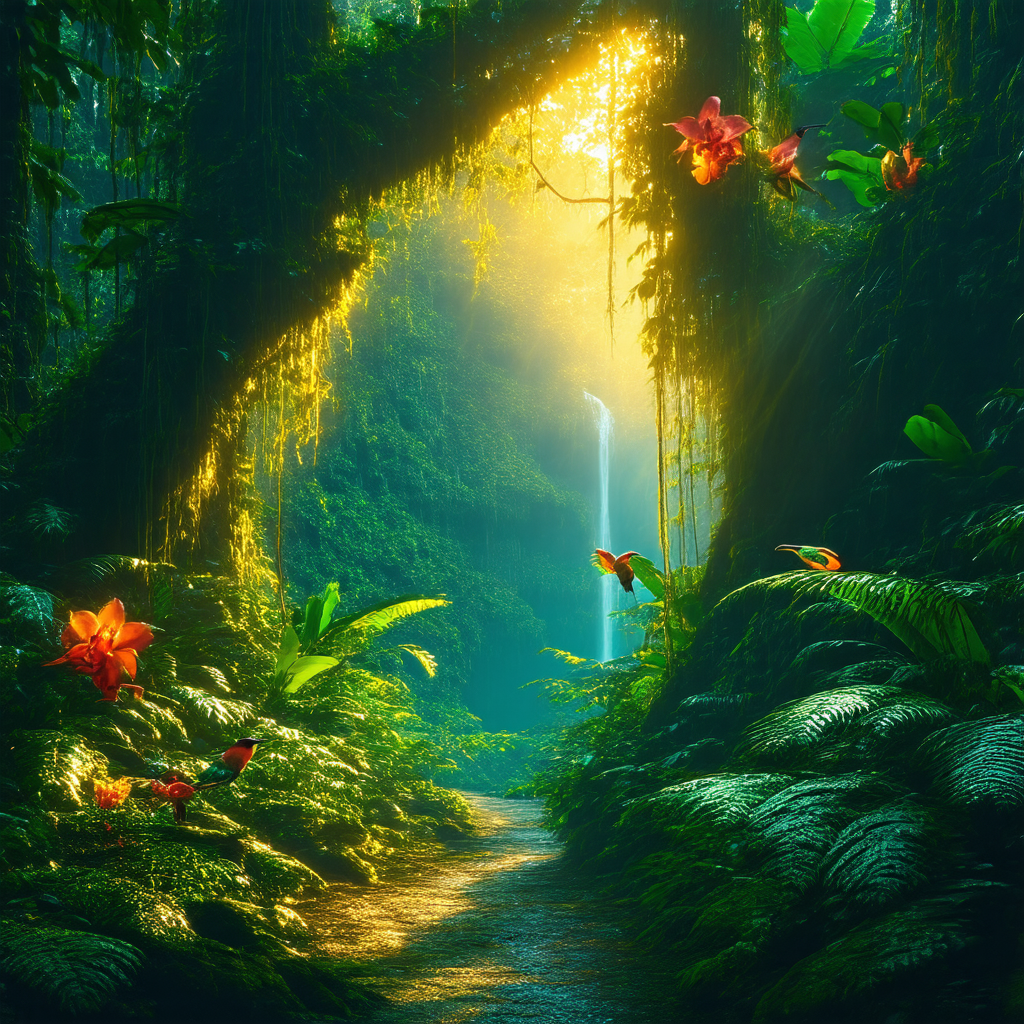

  0%|          | 0/28 [00:00<?, ?it/s]

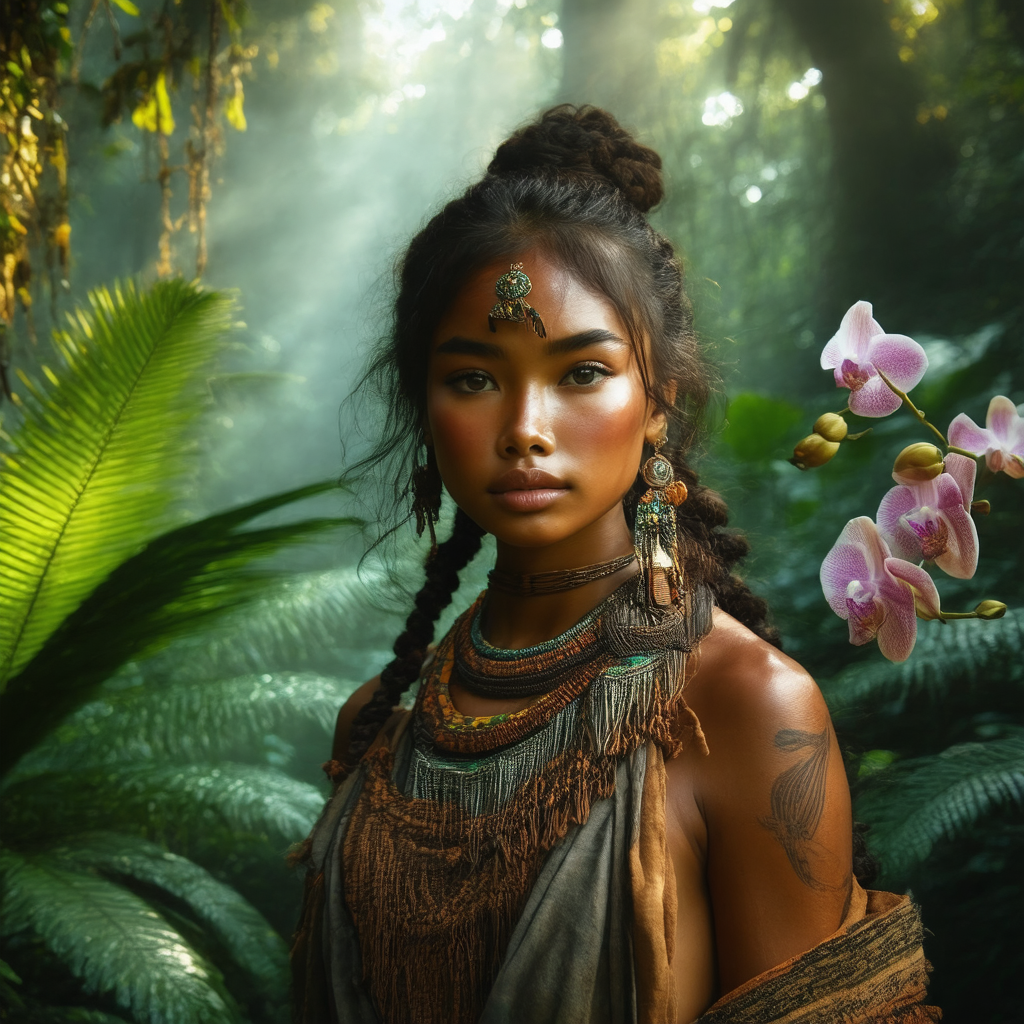

In [8]:
from diffusers import BitsAndBytesConfig, SD3Transformer2DModel
from diffusers import StableDiffusion3Pipeline
import torch
from PIL import Image
from IPython.display import display

pipeline.enable_model_cpu_offload()

prompt = (
    "A realistic portrait of a young tribal woman standing in a lush tropical jungle, "
    "her face illuminated by soft morning light filtering through the trees. "
    "She has natural glowing skin, intricate facial features, and wears traditional handmade jewelry and fabrics. "
    "The background is filled with misty ferns, orchids, and towering jungle trees. "
    "Highly detailed, cinematic lighting, ultra-realistic."
)

negative_prompt = (
    "blurry, distorted face, extra limbs, extra fingers, deformed eyes, bad anatomy, cartoon, low resolution, "
    "oversaturated, unnatural skin, text, watermark"
)

image = pipeline(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=28,
    guidance_scale=4.5,
    max_sequence_length=512,
).images[0]

image.save("jungle_portrait.png")
image = Image.open("jungle_portrait.png")
display(image)


  0%|          | 0/28 [00:00<?, ?it/s]

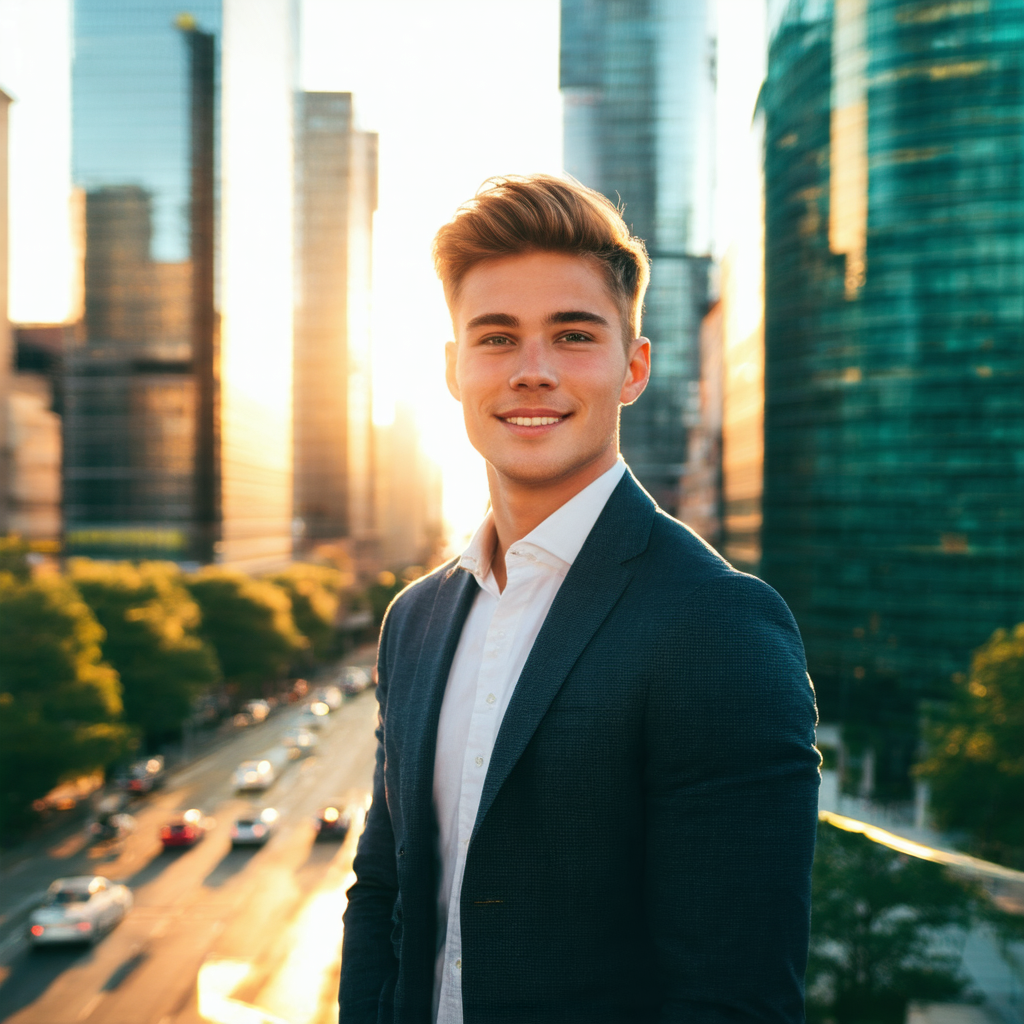

In [9]:
from diffusers import BitsAndBytesConfig, SD3Transformer2DModel
from diffusers import StableDiffusion3Pipeline
import torch
from PIL import Image
from IPython.display import display

pipeline.enable_model_cpu_offload()

prompt = (
    "A realistic portrait of a confident young professional, standing in a modern urban cityscape during golden hour. "
    "They wear business-casual attire with a subtle smile, short well-kept hair, and clear natural skin. "
    "Glass buildings and blurred traffic form the background, with soft warm sunlight reflecting off skyscrapers. "
    "Highly detailed, sharp focus, cinematic lighting, photorealistic."
)

negative_prompt = (
    "blurry, low resolution, distorted face, deformed hands, extra limbs, extra fingers, poor lighting, cartoonish, "
    "text, watermark, unnatural skin, bad anatomy"
)

image = pipeline(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=28,
    guidance_scale=4.5,
    max_sequence_length=512,
).images[0]

image.save("urban_professional.png")
image = Image.open("urban_professional.png")
display(image)
